In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
read_train_file = pd.read_excel ('E:\\python\\Final Participant Data Folder\\Final_Train.xlsx')
read_train_file.to_csv ('E:\\python\\Final Participant Data Folder\\Final_Train.csv', index = None, header=True)

#Here we converted xlsx file into csv format. 

In [3]:
read_train_file

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
read_train_file.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [5]:
read_train_file.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
read_train_file.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [7]:
#'Miscellaneous_Info' column has 2620 Null values out of 5961 records (43% data is null). Also from raw data analysis we can 
#see that this column has only comments in it and hence we will drop this column from model selection process.
read_train_file.drop('Miscellaneous_Info',axis=1,inplace=True)

In [8]:
read_train_file['Experience'] = read_train_file['Experience'].str.split()
read_train_file['Experience'] = read_train_file['Experience'].str[0].astype("int")

In [9]:
read_train_file['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int32

In [10]:
read_train_file['Experience'].dtype

dtype('int32')

In [11]:
#Now we can see that column 'Experience' is now of int data type and we have extracted only numerical figure from entire string 
#of the column. this will be helpful in our further analysis and model building process.

In [12]:
# Seperating city and area name from column 'Place'

read_train_file["Place"] = read_train_file["Place"].str.split(",")
read_train_file["City"] = read_train_file["Place"].str[-1]
read_train_file["Place"] = read_train_file["Place"].str[0]

#Here we have seperated City and location part from Place column and stored city part in seperate column 

In [13]:
read_train_file.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place              25
Profile             0
Fees                0
City               25
dtype: int64

In [14]:
read_train_file["City"].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: City, dtype: int64

In [15]:
read_train_file.index[read_train_file.City == 'e']

Int64Index([3980], dtype='int64')

In [16]:
read_train_file["City"][3980] = read_train_file['City'].mode()[0]

In [17]:
#We observed that column city had value 'e' in one of row [3980] which looked to be an outlier, so we have replaced it with
# most used value

In [18]:
#Now we can see column 'City' and 'Place' has 25 null values, so we will replace null values with most used value.
read_train_file['City'] = read_train_file['City'].fillna(read_train_file['City'].mode()[0])
read_train_file['Place'] = read_train_file['Place'].fillna(read_train_file['Place'].mode()[0])

In [19]:
read_train_file["City"].value_counts()

 Bangalore             1284
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64

In [20]:
read_train_file.head(20)

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,250,Chennai
5,BAMS,8,NaN,Porur,Ayurveda,100,Chennai
6,BHMS,42,NaN,Karol Bagh,Homeopath,200,Delhi
7,BDS,10,99%,Arekere,Dentist,200,Bangalore
8,"MBBS, MD - General Medicine",14,NaN,Old City,General Medicine,100,Hyderabad
9,"BSc, BDS",23,NaN,Athani,Dentist,100,Ernakulam


In [21]:
read_train_file["Rating"] = read_train_file["Rating"].str[:-1].astype("float")
#Here we are extracting only figure from column 'Rating' by skiping % value from this column

In [22]:
read_train_file["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
5956     98.0
5957      NaN
5958     97.0
5959     90.0
5960    100.0
Name: Rating, Length: 5961, dtype: float64

In [23]:
read_train_file.dtypes

Qualification     object
Experience         int32
Rating           float64
Place             object
Profile           object
Fees               int64
City              object
dtype: object

In [24]:
#Now since rating column is of float data type, we will replace null values with mean value.

read_train_file['Rating'] = read_train_file['Rating'].fillna(read_train_file['Rating'].mean())

In [25]:
read_train_file.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
City             0
dtype: int64

In [26]:
#Now we will work on qualification column
read_train_file["Qualification"]=read_train_file["Qualification"].str.split(",")
Qualification ={}
for x in read_train_file["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            #continue

#Here we have seperated various qualifications from all rows and then grouped them to take a count of number of instances
#for each qualification.

In [27]:
qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual =[]
for tup in qual:
    final_qual.append(tup[0])
print(final_qual)

#Here we have created tuple of qualifications of doctors wherein top 10 qualifications which has most number of count 
#are selected. 

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [28]:
for title in final_qual:
    read_train_file[title]=0
    
for x,y in zip(read_train_file["Qualification"].values,np.array([idx for idx in range(len(read_train_file))])):
    for q in x:
        q = q.strip()
        if q in final_qual:
            read_train_file[q][y] = 1
            
read_train_file.drop("Qualification",axis=1,inplace=True)

#Here we have created new columns with doctors qualification name which we received from above cell and then have set '1' for
#doctors which has that particular qualification and '0' for ones which do not possess that qualification. 

In [29]:
read_train_file.head()

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.000000,Kakkanad,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98.000000,Whitefield,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,94.643475,Mathikere - BEL,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,94.643475,Bannerghatta Road,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100.000000,Keelkattalai,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:>

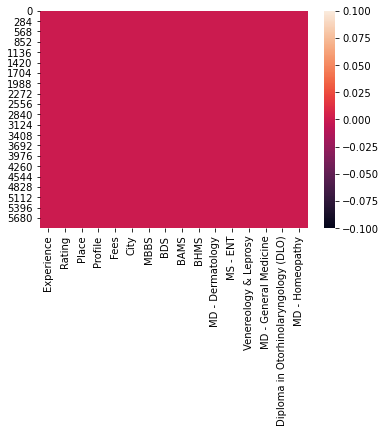

In [30]:
sns.heatmap(read_train_file.isnull()) # heatmap also indicates that there are no null values in dataset.

In [31]:
read_train_file.dtypes

Experience                                int32
Rating                                  float64
Place                                    object
Profile                                  object
Fees                                      int64
City                                     object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [32]:
#WE can see that columns Place, profile and city are of object datatypes and hence we will encode them into numerical

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
read_train_file['City']=le.fit_transform(read_train_file['City'])
read_train_file['Profile']=le.fit_transform(read_train_file['Profile'])
read_train_file['Place']=le.fit_transform(read_train_file['Place'])
read_train_file

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.000000,296,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,98.000000,855,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,94.643475,452,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,94.643475,68,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,100.000000,335,0,250,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.000000,70,3,300,0,1,0,0,0,0,1,0,0,0,0
5957,33,94.643475,535,4,100,1,1,0,0,0,0,0,0,0,0,0
5958,41,97.000000,215,4,600,3,1,0,0,0,0,0,0,0,0,0
5959,15,90.000000,840,4,100,6,1,0,0,0,0,0,0,1,0,0


In [34]:
read_train_file.dtypes

Experience                                int32
Rating                                  float64
Place                                     int32
Profile                                   int32
Fees                                      int64
City                                      int32
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [35]:
read_train_file.describe()

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,94.643475,410.120282,2.441872,307.944640,3.044623,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364
std,11.142798,5.244204,255.174855,1.658014,190.920373,2.298823,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601
min,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,94.643475,195.000000,1.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,94.643475,404.000000,2.000000,300.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,96.000000,622.000000,4.000000,500.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,865.000000,5.000000,950.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#We can see that for column Rating 1st and 2nd quartile has same value.
#In fees column min value and max value has a huge difference.


Experience                                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Rating                                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Place                                    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Profile                                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Fees                                       AxesSubplot(0.125,0.518913;0.168478x0.16413)
City                                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MBBS                                    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
BDS                                     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
BAMS                                       AxesSubplot(0.125,0.321957;0.168478x0.16413)
BHMS                                    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MD - Dermatology                        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
MS - ENT                        

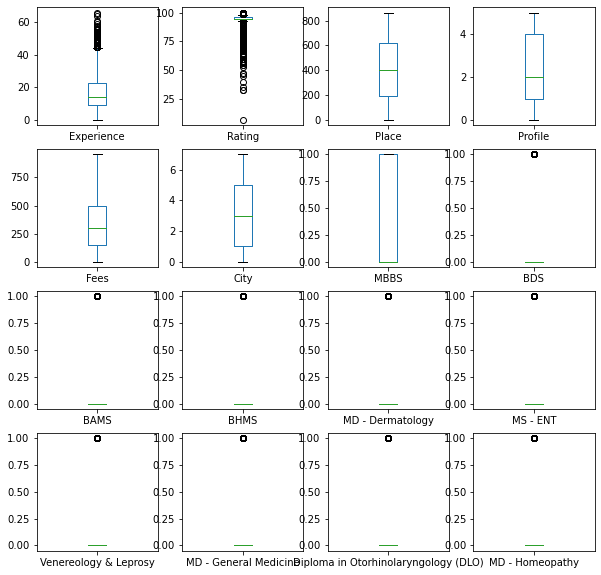

In [37]:
read_train_file.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

In [38]:
#We can see Experience and Rating column have outliers and we will need to treat them.

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(read_train_file))
z
data_new = read_train_file[(z<3).all(axis = 1)]

In [40]:
data_new.shape

(4512, 16)

In [41]:
read_train_file. shape

(5961, 16)

In [42]:
read_train_file.skew()

Experience                              0.991089
Rating                                 -4.906222
Place                                   0.121186
Profile                                 0.108803
Fees                                    0.751870
City                                    0.003110
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

In [43]:
data_new.skew()

Experience                              0.960986
Rating                                 -1.423551
Place                                   0.137118
Profile                                 0.392346
Fees                                    0.816296
City                                   -0.018964
MBBS                                    0.606002
BDS                                     0.866952
BAMS                                    1.783040
BHMS                                    2.159689
MD - Dermatology                        3.411209
MS - ENT                                0.000000
Venereology & Leprosy                   0.000000
MD - General Medicine                   0.000000
Diploma in Otorhinolaryngology (DLO)    0.000000
MD - Homeopathy                         0.000000
dtype: float64

In [44]:
# From outlier removal techique using zscore method we can see data loss of 24.30 % and hence we will keep those outliers 

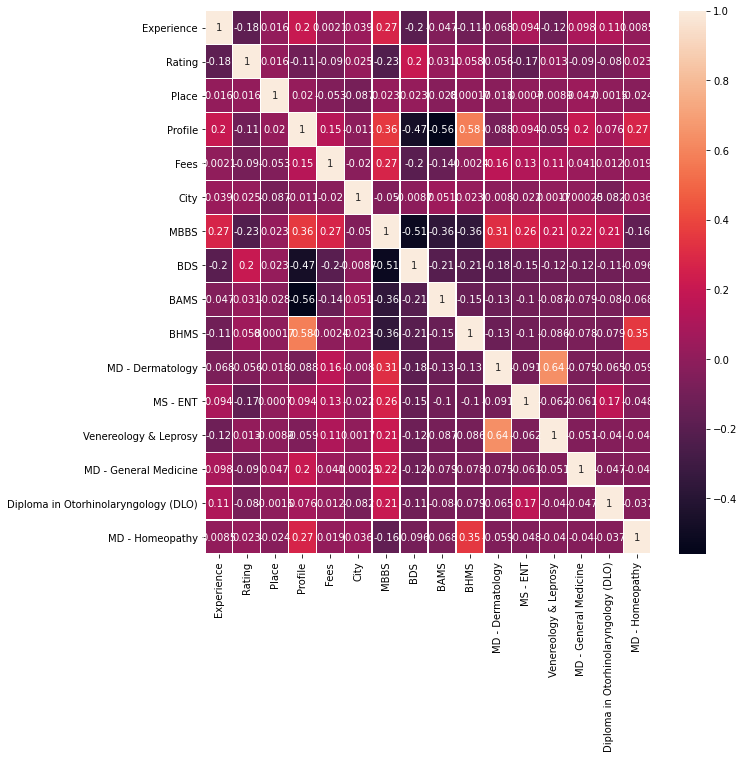

In [45]:
corr= read_train_file.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [46]:
# We can see that MBBS and BDS qualifications are very negatively correlated with each other

In [47]:
y = read_train_file.iloc[:,4]

In [48]:
y.shape

(5961,)

In [49]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [50]:
x = read_train_file.drop('Fees',axis=1)

In [51]:
x.shape

(5961, 15)

In [52]:
x

,Experience,Rating,Place,Profile,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.000000,296,5,4,0,0,0,1,0,0,0,0,0,1
1,12,98.000000,855,0,0,0,0,1,0,0,0,0,0,0,0
2,9,94.643475,452,3,0,1,0,0,0,0,0,0,0,0,0
3,12,94.643475,68,0,0,0,0,1,0,0,0,0,0,0,0
4,20,100.000000,335,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.000000,70,3,0,1,0,0,0,0,1,0,0,0,0
5957,33,94.643475,535,4,1,1,0,0,0,0,0,0,0,0,0
5958,41,97.000000,215,4,3,1,0,0,0,0,0,0,0,0,0
5959,15,90.000000,840,4,6,1,0,0,0,0,0,0,1,0,0


In [53]:
from sklearn.preprocessing import power_transform
raw_data = power_transform(read_train_file, method = 'yeo-johnson')

#To remove skewness from data we are using 'yeo-johnson' method

In [54]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [55]:
scale = StandardScaler()
x=scale.fit_transform(x)

In [56]:
models = [KNeighborsRegressor(),LinearRegression(),RandomForestRegressor(),Lasso(),Ridge(),SVR()]
#models = [LinearRegression()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        #print("Entered for:", j)
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=abs(r2_score(pred,test_y))
        #print("for model:", j, "score is:",temp_score )
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 19.610115308680598 of model: SVR() with best random state value is: 71


In [57]:
sv=SVR()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
sv.fit(train_x,train_y)
predsv = sv.predict(test_x)
print("Random state used is:",final_temp_state)
print("R2 score:",abs(r2_score(predsv,test_y)))
print("Absolute squarred error:", mean_absolute_error(test_y,predsv))
print("Mean squarred error:", mean_squared_error(test_y,predsv))

Random state used is: 71
R2 score: 19.610115308680598
Absolute squarred error: 151.36402025501016
Mean squarred error: 38726.52552227213


Text(0, 0.5, 'Predicted values')

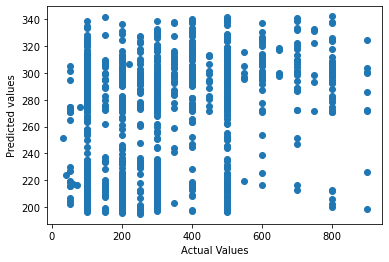

In [58]:
plt.scatter(x=test_y,y=predsv)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [59]:
#From scatter plot diagram we can see that feed is very highly dispersed

In [60]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [61]:
abc = AdaBoostRegressor(n_estimators=50,base_estimator=sv,learning_rate=1)
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Accuracy score:",abs(r2_score(predabc,test_y)))

Accuracy score: 18.370133696535138


In [62]:
#We can see that SVR() gives us the  best score and hence we will be using this algorithm for our model building.

In [63]:
import pickle
filename = 'E:\\python\\Final Participant Data Folder\\doctor_fees.pkl'
pickle.dump(sv,open(filename,'wb'))

# Test data logic starts here 

In [64]:
read_test_file = pd.read_excel ('E:\\python\\Final Participant Data Folder\\Final_Test.xlsx')
read_test_file.to_csv ('E:\\python\\Final Participant Data Folder\\Final_Test.csv', index = None, header=True)

#Here we converted xlsx file into csv format. 

In [65]:
read_test_file.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [66]:
read_test_file.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [67]:
read_test_file.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [68]:
read_test_file.drop('Miscellaneous_Info',axis=1,inplace=True)

In [69]:
read_test_file['Experience'] = read_test_file['Experience'].str.split()
read_test_file['Experience'] = read_test_file['Experience'].str[0].astype("int")

In [70]:
read_test_file['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: int32

In [71]:
read_test_file["Place"] = read_test_file["Place"].str.split(",")
read_test_file["City"] = read_test_file["Place"].str[-1]
read_test_file["Place"] = read_test_file["Place"].str[0]

In [72]:
read_test_file["City"].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: City, dtype: int64

In [73]:
read_test_file.isnull().sum()

Qualification       0
Experience          0
Rating           1090
Place               6
Profile             0
City                6
dtype: int64

In [74]:
read_test_file['City'] = read_test_file['City'].fillna(read_test_file['City'].mode()[0])
read_test_file['Place'] = read_test_file['Place'].fillna(read_test_file['Place'].mode()[0])

In [75]:
read_test_file["Rating"] = read_test_file["Rating"].str[:-1].astype("float")

In [76]:
read_test_file['Rating'] = read_test_file['Rating'].fillna(read_test_file['Rating'].mean())

In [77]:
#Now we will work on qualification column
read_test_file["Qualification"]=read_test_file["Qualification"].str.split(",")
Qualification ={}
for x in read_test_file["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            #continue

In [78]:
qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual =[]
for tup in qual:
    final_qual.append(tup[0])
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [79]:
for title in final_qual:
    read_test_file[title]=0

In [80]:
for x,y in zip(read_test_file["Qualification"].values,np.array([idx for idx in range(len(read_test_file))])):
    for q in x:
        q = q.strip()
        if q in final_qual:
            read_test_file[q][y] = 1
            
read_test_file.drop("Qualification",axis=1,inplace=True)

In [81]:
read_test_file.dtypes

Experience                                int32
Rating                                  float64
Place                                    object
Profile                                  object
City                                     object
MBBS                                      int64
BDS                                       int64
BHMS                                      int64
BAMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
MD - General Medicine                     int64
Venereology & Leprosy                     int64
Diploma in Otorhinolaryngology (DLO)      int64
DDVL                                      int64
dtype: object

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
read_test_file['City']=le.fit_transform(read_test_file['City'])
read_test_file['Profile']=le.fit_transform(read_test_file['Profile'])
read_test_file['Place']=le.fit_transform(read_test_file['Place'])
read_test_file

,Experience,Rating,Place,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,94.441472,142,4,6,1,0,0,0,0,0,0,0,0,0
1,31,94.441472,577,3,5,1,0,0,0,0,0,0,0,1,0
2,40,70.000000,212,2,1,1,0,0,0,0,0,0,0,0,1
3,0,94.441472,373,0,3,0,0,0,1,0,0,0,0,0,0
4,16,100.000000,231,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,94.441472,58,0,0,0,0,0,1,0,0,0,0,0,0
1983,4,94.441472,96,2,1,1,0,0,0,1,0,0,1,0,0
1984,9,94.441472,423,4,1,1,0,0,0,0,0,0,0,0,0
1985,12,98.000000,26,1,0,0,1,0,0,0,0,0,0,0,0


In [83]:
read_test_file.isnull().sum()

Experience                              0
Rating                                  0
Place                                   0
Profile                                 0
City                                    0
MBBS                                    0
BDS                                     0
BHMS                                    0
BAMS                                    0
MD - Dermatology                        0
MS - ENT                                0
MD - General Medicine                   0
Venereology & Leprosy                   0
Diploma in Otorhinolaryngology (DLO)    0
DDVL                                    0
dtype: int64

In [84]:
from sklearn.preprocessing import power_transform
raw_data = power_transform(read_test_file, method = 'yeo-johnson')

In [85]:
fitted_model = pickle.load(open(filename,'rb'))

In [86]:
fitted_model

SVR()

In [87]:
test_prediction = fitted_model.predict(read_test_file)

In [88]:
test_prediction_file = pd.DataFrame(test_prediction)

In [89]:
test_prediction_file.to_csv("E:\\python\\Final Participant Data Folder\\doc_fees_predict.csv",header=0)